In [25]:
from google.colab import files

uploaded = files.upload()  # Opens a file upload dialog


Saving data.csv to data.csv


In [26]:
import os

print("Current Directory:", os.getcwd())
print("Files in Directory:", os.listdir())  # Lists all files in the current directory


Current Directory: /content
Files in Directory: ['.config', 'data.csv', 'sample_data']


In [27]:
import pandas as pd

file_path = "data.csv"  # If uploaded to the current directory
df = pd.read_csv(file_path)

print(df.head())  # Display first few rows


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   70    1   3       130   322    0        2      109      0      2.4      1   
1   67    0   2       115   564    0        2      160      0      1.6      1   
2   57    1   1       124   261    0        0      141      0      0.3      0   
3   64    1   3       128   263    0        0      105      1      0.2      1   
4   74    0   1       120   269    0        2      121      1      0.2      0   

   ca  thal  target  
0   3     1       1  
1   0     3       0  
2   0     3       1  
3   1     3       0  
4   1     1       0  


In [29]:
import numpy as np
import pandas as pd

# Load the dataset (update the file path as needed)
file_path = r"data.csv"
df = pd.read_csv(file_path)

# Separate data by class (assuming binary classification: 0 and 1)
class_0 = df[df["target"] == 0].drop(columns=["target"])
class_1 = df[df["target"] == 1].drop(columns=["target"])

# Compute centroids (mean vectors)
centroid_0 = class_0.mean(axis=0)
centroid_1 = class_1.mean(axis=0)

# Compute intraclass spread (standard deviation)
spread_0 = class_0.std(axis=0)
spread_1 = class_1.std(axis=0)

# Compute interclass distance (Euclidean distance between centroids)
interclass_distance = np.linalg.norm(centroid_0 - centroid_1)

# Display results
print("Class 0 Centroid:\n", centroid_0)
print("\nClass 1 Centroid:\n", centroid_1)
print("\nClass 0 Spread (Standard Deviation):\n", spread_0)
print("\nClass 1 Spread (Standard Deviation):\n", spread_1)
print("\nInterclass Distance:\n", interclass_distance)


Class 0 Centroid:
 age          52.706667
sex           0.553333
cp            1.820000
trestbps    128.866667
chol        244.213333
fbs           0.153333
restecg       0.860000
thalach     158.333333
exang         0.153333
oldpeak       0.622667
slope         0.400000
ca            0.286667
thal          1.373333
dtype: float64

Class 1 Centroid:
 age          56.591667
sex           0.833333
cp            2.616667
trestbps    134.441667
chol        256.466667
fbs           0.141667
restecg       1.225000
thalach     138.858333
exang         0.550000
oldpeak       1.584167
slope         0.816667
ca            1.150000
thal          2.383333
dtype: float64

Class 0 Spread (Standard Deviation):
 age          9.509830
sex          0.498813
cp           0.927362
trestbps    16.457660
chol        54.019085
fbs          0.361516
restecg      0.990085
thalach     19.283357
exang        0.361516
oldpeak      0.800851
slope        0.590757
ca           0.648557
thal         0.755709
dtype: f

In [3]:
from google.colab import files

uploaded = files.upload()  # Opens a file upload dialog


Saving data.csv to data.csv


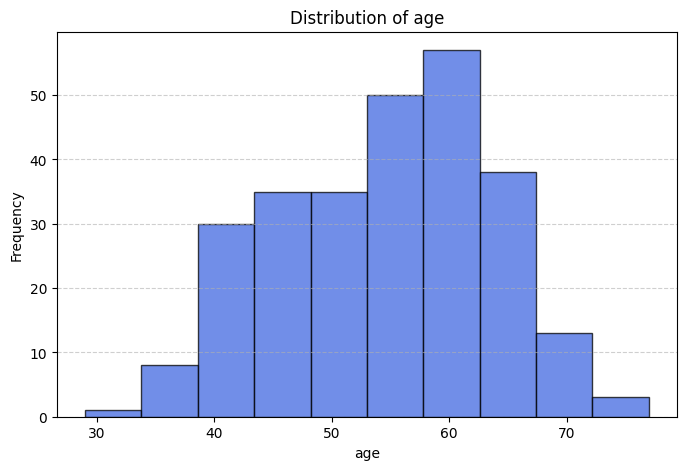

Feature Analyzed: age
Mean: 54.43
Variance: 82.98


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = r"data.csv"  # Path to the uploaded file
df = pd.read_csv(file_path)

# Select a numerical feature for analysis
feature = "age"  # Modify this to analyze a different feature

# Extract and clean the data (remove missing values if any)
data = df[feature].dropna()

# Compute histogram data
hist_counts, bin_edges = np.histogram(data, bins=10)  # Dividing data into 10 intervals

# Calculate statistical properties
mean_val = data.mean()
variance_val = data.var()

# Generate the histogram plot
plt.figure(figsize=(8, 5))
plt.hist(data, bins=10, color='royalblue', edgecolor='black', alpha=0.75)
plt.xlabel(feature)
plt.ylabel("Frequency")
plt.title(f"Distribution of {feature}")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# Display results
print(f"Feature Analyzed: {feature}")
print(f"Mean: {mean_val:.2f}")
print(f"Variance: {variance_val:.2f}")


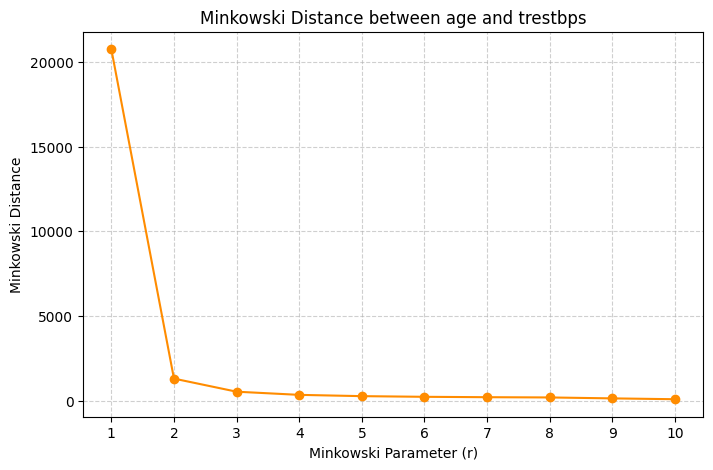

Minkowski Distance (r=1): 20766.0000
Minkowski Distance (r=2): 1296.6788
Minkowski Distance (r=3): 522.7023
Minkowski Distance (r=4): 335.7025
Minkowski Distance (r=5): 259.7176
Minkowski Distance (r=6): 220.5251
Minkowski Distance (r=7): 197.4652
Minkowski Distance (r=8): 182.7670
Minkowski Distance (r=9): 127.6042
Minkowski Distance (r=10): 77.9470


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
file_path = r"data.csv"  # Adjust if necessary
df = pd.read_csv(file_path)

# Select two numerical features
feature_1 = "age"  # Modify as needed
feature_2 = "trestbps"  # Modify as needed

# Extract and clean the data (remove missing values)
data_1 = df[feature_1].dropna().values
data_2 = df[feature_2].dropna().values

# Ensure both features have the same number of values
min_len = min(len(data_1), len(data_2))
data_1, data_2 = data_1[:min_len], data_2[:min_len]

# Compute Minkowski distance for r values from 1 to 10
r_values = np.arange(1, 11)
minkowski_distances = [np.sum(np.abs(data_1 - data_2) ** r) ** (1 / r) for r in r_values]

# Plot the distances
plt.figure(figsize=(8, 5))
plt.plot(r_values, minkowski_distances, marker='o', linestyle='-', color='darkorange', markersize=6)
plt.xlabel("Minkowski Parameter (r)")
plt.ylabel("Minkowski Distance")
plt.title(f"Minkowski Distance between {feature_1} and {feature_2}")
plt.xticks(r_values)
plt.grid(alpha=0.6, linestyle='--')
plt.show()

# Display calculated distances
for r, dist in zip(r_values, minkowski_distances):
    print(f"Minkowski Distance (r={r}): {dist:.4f}")


In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Load dataset
file_path = r"data.csv"  # Path to the uploaded dataset
df = pd.read_csv(file_path)

# Check available class labels
print("Unique class labels in dataset:", df["target"].unique())

# Ensure binary classification (if more than 2 classes, filter them)
df = df[df["target"].isin([0, 1])]  # Keeping only two classes if needed

# Separate features (X) and target labels (y)
X = df.drop(columns=["target"])  # Feature matrix
y = df["target"]  # Class labels

# Split into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display shapes of the resulting datasets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Unique class labels in dataset: [1 0]
Training set shape: (189, 13) (189,)
Testing set shape: (81, 13) (81,)


In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Load dataset
file_path = "data.csv"
df = pd.read_csv(file_path)

# Ensure binary classification (filtering only classes 0 and 1 if needed)
df = df[df["target"].isin([0, 1])]

# Split features and target variable
X = df.drop(columns=["target"])
y = df["target"]

# Split data into train (70%) and test (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display dataset shape
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (189, 13) (189,)
Testing set shape: (81, 13) (81,)


In [10]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize kNN with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn.fit(X_train, y_train)

print("kNN model trained successfully!")


kNN model trained successfully!


In [11]:
# Evaluate accuracy on the test set
accuracy = knn.score(X_test, y_test)
print(f"Accuracy of kNN (k=3) on test set: {accuracy:.4f}")


Accuracy of kNN (k=3) on test set: 0.6667


In [12]:
# Predict class labels for test set
y_pred = knn.predict(X_test)

# Display first 10 predictions
print("First 10 predictions:", y_pred[:10])


First 10 predictions: [1 1 0 0 1 1 0 0 0 1]


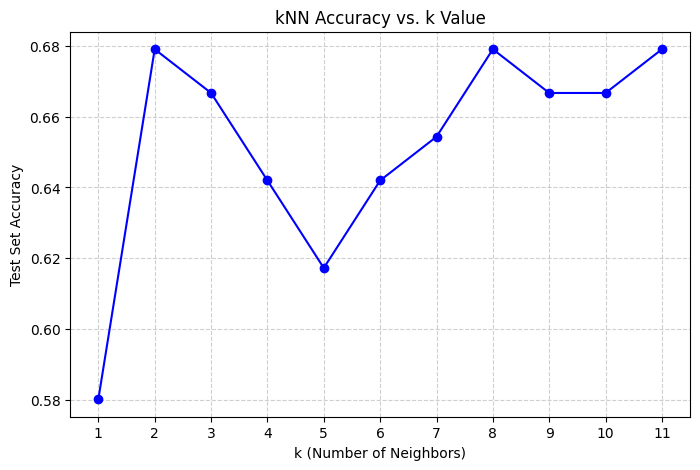

In [13]:
import matplotlib.pyplot as plt

k_values = range(1, 12)  # k from 1 to 11
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    acc = knn.score(X_test, y_test)
    accuracies.append(acc)

# Plot accuracy vs k
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Test Set Accuracy")
plt.title("kNN Accuracy vs. k Value")
plt.xticks(k_values)
plt.grid(alpha=0.6, linestyle="--")
plt.show()


In [14]:
from sklearn.metrics import confusion_matrix, classification_report

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Compute precision, recall, F1-score
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Confusion Matrix:
 [[34 15]
 [12 20]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.69      0.72        49
           1       0.57      0.62      0.60        32

    accuracy                           0.67        81
   macro avg       0.66      0.66      0.66        81
weighted avg       0.67      0.67      0.67        81

